In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd

In [2]:
wd = os.getcwd()
wd = wd.replace('.ipynb_checkpoints', '')
directory = os.path.join(wd, 'data', 'requests5')
retrieved_data =  []
for file in os.listdir(directory):
    with open(os.path.join(directory, file), "r") as j:
        a = json.loads(j.read())
        retrieved_data.append(a)
        print('Added ', file)
#retrieved_data
retrieved_data = sorted(retrieved_data, key=itemgetter('citationCount'), reverse=True)

Added  req4Seasons.json
Added  reqA2D2.json
Added  reqA3D.json
Added  reqA9.json
Added  reqaiMotive.json
Added  reqAmodalCityscapes.json
Added  reqAMUSE.json
Added  reqApolloScape.json
Added  reqArgoverse1Stereo.json
Added  reqArgoverse3DTracking.json
Added  reqArgoverseMotionForecasting.json
Added  reqAugKITTI.json
Added  reqAutomatumOpenHighway.json
Added  reqAutonomousPlatformInertial.json
Added  reqBayArea.json
Added  reqBDD100k.json
Added  reqBeyondPASCAL.json
Added  reqBLVD.json
Added  reqBoreas.json
Added  reqBoschSmallTrafficLightsDataset.json
Added  reqBoschTL.json
Added  reqBoxCars116k.json
Added  reqBoxy.json
Added  reqBrain4Cars.json
Added  reqCADC.json
Added  reqCADP.json
Added  reqCaltechLanes.json
Added  reqCaltechPedestrian.json
Added  reqCamVid.json
Added  reqCarlaScenes.json
Added  reqCARLAWildLifeCWL.json
Added  reqCARRADA.json
Added  reqCars.json
Added  reqCCSAD.json
Added  reqCityscapes3D.json
Added  reqCityscapesDVPS.json
Added  reqCODA.json
Added  reqComma2k19.js

Paper releases over time

In [3]:
publications = []
for o_paper in retrieved_data:
    publications.append(o_paper['paperInfo']['year'])

In [4]:
total_citations = np.zeros((1, 16))
print(total_citations)
for o_paper in retrieved_data:
    if 'citations' in o_paper['paperInfo'].keys():
        for citation in o_paper['paperInfo']['citations']:
            if 'year' in citation.keys():
                year = citation['year']
                if year is not None:
                    total_citations[0, year-2008] += 1
total_citations

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[4.000e+00, 5.300e+01, 1.500e+02, 2.230e+02, 2.410e+02, 3.180e+02,
        4.930e+02, 7.550e+02, 9.830e+02, 1.762e+03, 2.838e+03, 4.545e+03,
        7.127e+03, 8.654e+03, 9.898e+03, 2.600e+01]])

In [5]:
citations = pd.Series(publications).value_counts().sort_index()

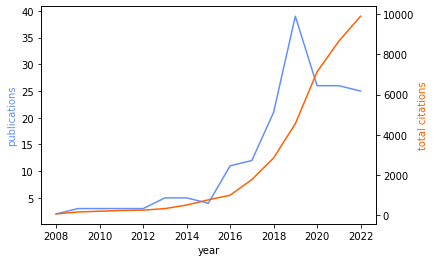

In [6]:
fig,ax = plt.subplots()
ax.plot(citations.index, citations, color='#648fff')
ax.set_ylabel('publications', color='#648fff')
ax.set_xlabel('year')

ax2=ax.twinx()
ax2.plot(citations.index, total_citations[0][1:-1], color='#fe6100')
ax2.set_ylabel('total citations', color='#fe6100')
plt.savefig('output/growth_publications_and_citations.pdf', bbox_inches='tight')
plt.show()

In [7]:
ooo

NameError: name 'ooo' is not defined

In [ ]:
publications = []
for o_paper in retrieved_data:
    publications.append(o_paper['paperInfo']['year'])

In [ ]:
features = ['number of scenes', 'storage size [GB]', 'total length [h]', 'number of sensors'] #,  'Altmetric score at 3 mos'

In [ ]:
meta_data = np.empty((len(retrieved_data), len(features)+1))
meta_data[:] = np.NAN
for index, o_paper in enumerate(retrieved_data):
    if 'year' in o_paper['paperInfo'].keys():
        altmetric = np.NAN
        sensors_value = np.NAN
        frames_value = np.NAN
        lengthOfScenes = np.NAN
        numberOfScenes = np.NAN
        size_hours = np.NAN
        size_storage = np.NAN

        year = o_paper['paperInfo']['year']
        try:
            altmetric = o_paper['altmetrics'][2]['similar_age_3m_percentile']
        except:
            pass
        try:
            if o_paper['sensors'] != "-":
                sensors_value = int(len(list(o_paper['sensors'].split(','))))
        except:
            pass
        try:
            if o_paper['frames'] != "-":
                frames_value = o_paper['frames']
        except:
            pass
        try:
            if o_paper['lengthOfScenes'] != "-":
                lengthOfScenes = o_paper['lengthOfScenes']
        except:
            pass
        try:
            if o_paper['numberOfScenes'] != "-":
                numberOfScenes = o_paper['numberOfScenes']
        except:
            pass
        try:
            if o_paper['size_hours'] != "-":
                size_hours = o_paper['size_hours']
        except:
            pass
        try:
            if o_paper['size_storage'] != "-" and len(o_paper['size_storage']) > 0:
                size_storage = o_paper['size_storage']
        except:
            pass
        meta_data[index, :] = [year, numberOfScenes, size_storage, size_hours, sensors_value] #, altmetric

In [ ]:
meta_data

In [ ]:
df_meta_data = pd.DataFrame(meta_data).set_index(0)


In [ ]:
df_meta_data.columns = features

In [ ]:
array = np.empty((len(features), 15))
array[:] = np.NAN
for index_type, col in enumerate(df_meta_data.columns):
    for index_year, year in enumerate(range(2008, 2023)):
        annual_data = df_meta_data[df_meta_data.index==year]
        array[index_type, index_year] = annual_data[col].mean()

In [ ]:
std = np.empty((len(features), 15))
std[:] = np.NAN
for index_type, col in enumerate(df_meta_data.columns):
    for index_year, year in enumerate(range(2008, 2023)):
        annual_data = df_meta_data[df_meta_data.index==year]
        std[index_type, index_year] = annual_data[col].std()
std

In [ ]:
colors = ['#648fff', '#fe6100', '#dc267f', '#ffb000'] #, '#785ef0'
for idx, row in enumerate(features):
    plt.semilogy([*range(2012, 2022)], array[idx, 4:14], label=row, color=colors[idx])

    #if array[idx, 4:14] == np.NaN or std[idx, 4:14] == 0:
    #upper_std = (array[idx, 4:14] + std[idx, 4:14])
    #lower_std = (array[idx, 4:14] - std[idx, 4:14])
    #else:
    #    upper_std = array[idx, 4:14]
    #    lower_std = array[idx, 4:14]
    #plt.fill_between([*range(2012, 2022)], lower_std, upper_std, color=colors[idx], alpha=0.1)
    plt.xlim(2012, 2021)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best')
plt.xticks([*range(2012, 2022)])
plt.xlabel('year of publication')
plt.ylabel('log(y)')
plt.savefig('growth_of_data.pdf', bbox_inches='tight')
plt.show()
#plt.ylim(0, 1000)

#plt.show()

In [ ]:
print(features)